# <a id='toc1_'></a>[Topic 20 - Nyquist Analysis](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Topic 20 - Nyquist Analysis](#toc1_)    
    - [repeat with a gain of 1/3](#toc1_1_1_)    
  - [Example 20-4](#toc1_2_)    
  - [Side by Side Nyquist](#toc1_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()
else:
    print('Basic file found')

from basic_material import *

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d, margin
from control import bode_plot, nyquist_plot, nyquist_response
    
import cmath
from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.3
Control Package Found
This is a library of basic functions for 16.06
This is a library of useful functions for the control systems in 16.06



Found breakin/out at K = 1.794
At possible locations s = -6.472

Found breakin/out at K = 0.006
At possible locations s = 2.472


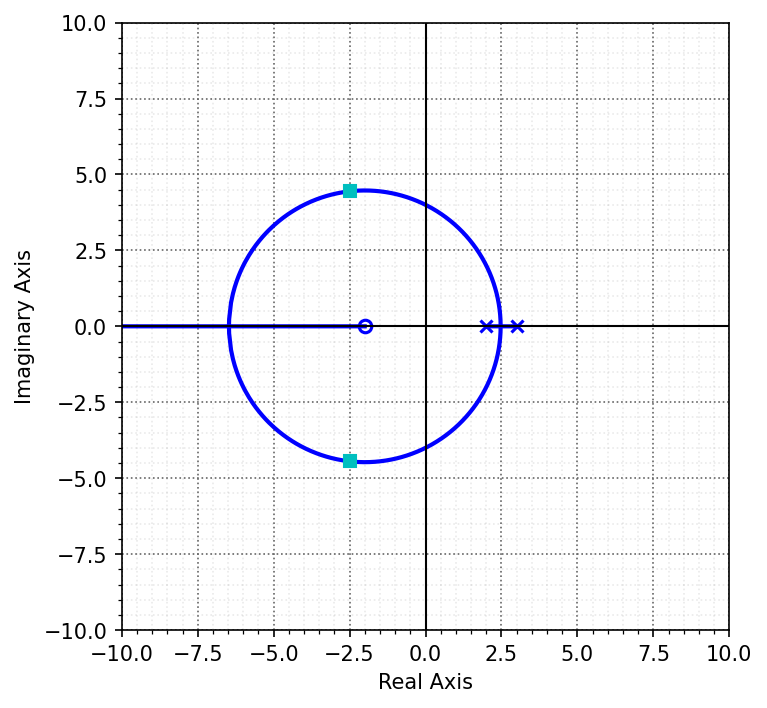

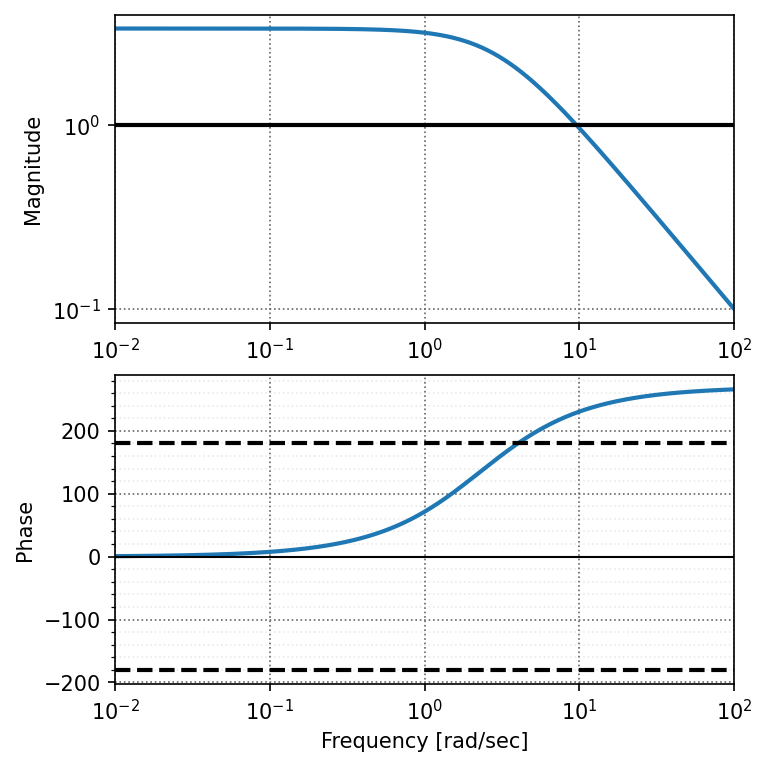

In [2]:
G = 10*tf((1,2),(1,-2))*tf(1,(1,-3))
Gcl = feedback(G,1)
Gcl_reduced_gain = feedback(G/3,1)

fig2, ax = plt.subplots(num=11, nrows=1, ncols=1, figsize=(5, 5),dpi=150,constrained_layout = True)
try:
    rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), color='b', grid=False,ax=ax)
except:
    rlist, klist = rlocus(G, kvect=Root_Locus_gains(G), grid=False,ax=ax)
ax.set_aspect('equal')
ax.set_xlim([-10, 10]);ax.set_ylim([-10, 10])
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
nicegrid(ax)
plt.plot(Gcl.poles().real,Gcl.poles().imag,'cs')
savefig("./figs/L20_fig1.pdf", dpi=600)
plt.show()

w = np.logspace(-2,2,1000)
Gf = G(complex(0,1)*w)
fig, ax = plt.subplots(2,1,figsize=(5, 5),dpi=150,constrained_layout = True)
ax[0].loglog(w,np.abs(Gf))
ax[1].semilogx(w,np.unwrap(np.angle(Gf))*r2d)
ax[0].axhline(y=1,ls='-',c='k')
ax[1].axhline(y=-180,ls='--',c='k')
ax[1].axhline(y=180,ls='--',c='k')
nicegrid(ax)
ax[0].set_ylabel("Magnitude")
ax[1].set_ylabel("Phase")
ax[1].set_xlabel("Frequency [rad/sec]")
savefig("./figs/L20_fig2.pdf", dpi=600)
plt.show()


### <a id='toc1_1_1_'></a>[repeat with a gain of 1/3](#toc0_)

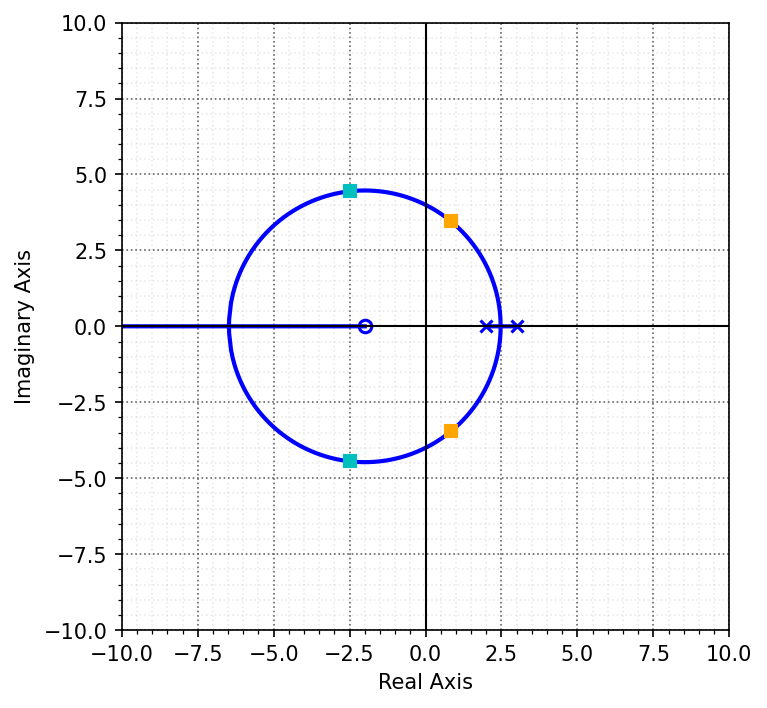

<Figure size 3000x1500 with 0 Axes>

In [3]:
axs = fig2.get_axes()
axs[0].plot(Gcl_reduced_gain.poles().real,Gcl_reduced_gain.poles().imag,c='orange',marker='s',linestyle='None')
savefig("./figs/L20_fig1a.pdf", dpi=600)
fig2

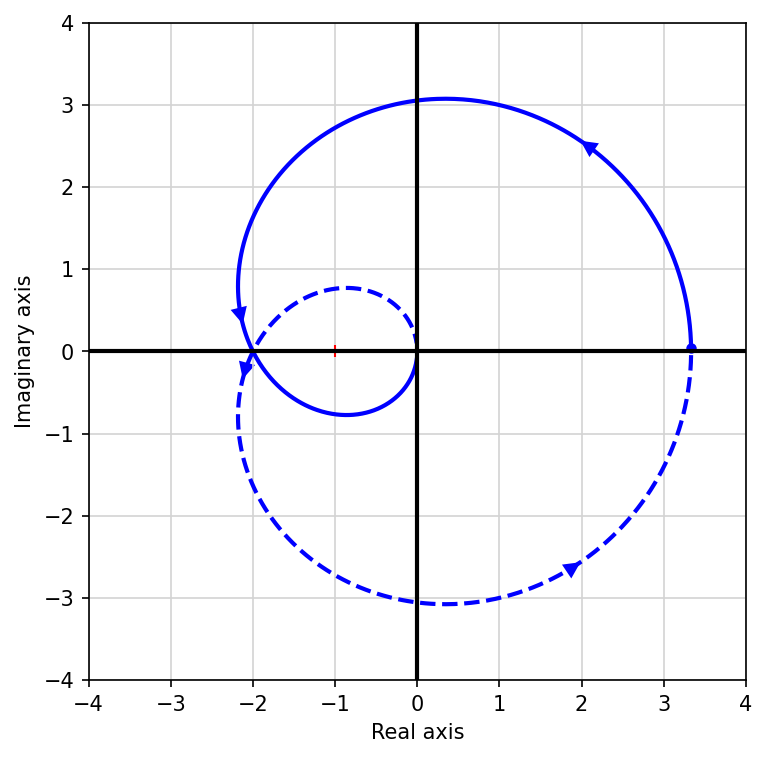

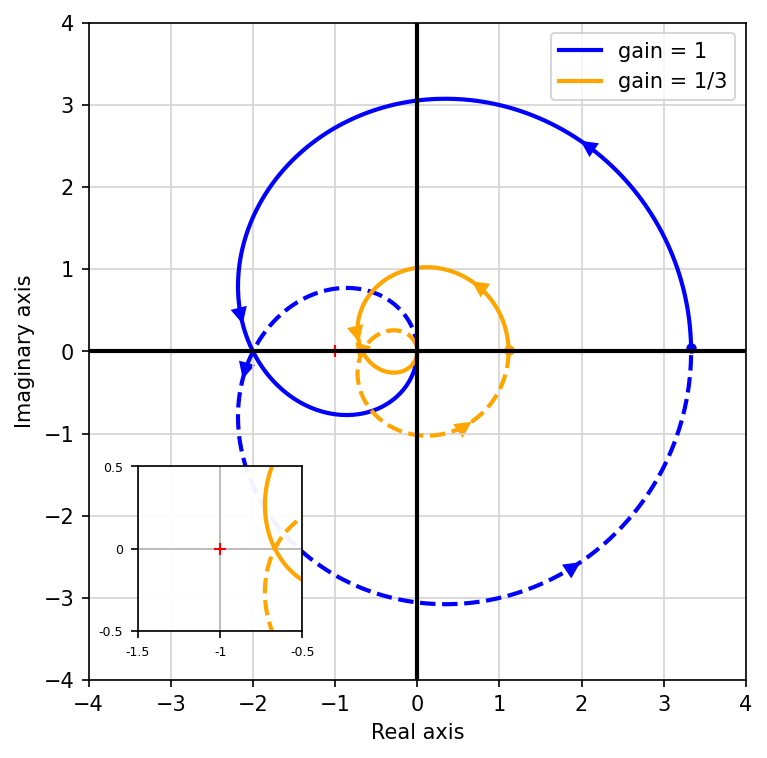

In [4]:
fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True,num=1)
RR = 0.25
resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)
resp.plot(title='Nyquist plot', color='b', ax=ax)

plt.xlim([-1/RR,1/RR])
plt.ylim([-1/RR,1/RR])
ax.set_aspect('equal')
ax.axhline(y=0,ls='-',c='k')
ax.axvline(x=0,ls='-',c='k')
savefig("./figs/L20_fig3.pdf", dpi=600)
plt.show()

fig, ax = plt.subplots(1,figsize=(5, 5),dpi=150,constrained_layout = True)
RR = 0.25
resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)
resp.plot(title='Nyquist plot', color='b', ax=ax)
respg = nyquist_response(G/3,w,indent_direction='right',indent_radius=RR,indent_points=100)
respg.plot(title='Nyquist plot', color='orange', ax=ax)

plt.xlim([-1/RR,1/RR])
plt.ylim([-1/RR,1/RR])
ax.set_aspect('equal')
ax.axhline(y=0,ls='-',c='k')
ax.axvline(x=0,ls='-',c='k')
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),
    Line2D([0], [0], color='orange', lw=2, linestyle='-')]
# Add legend with custom handles
ax.legend(custom_lines, ['gain = 1', 'gain = 1/3' ,])

# Create an inset axis at the bottom right
inset_ax = ax.inset_axes(bounds=[.075, .075, .25, .25], transform=ax.transAxes,\
    xticks=[-0.5,-1,-1.5],xticklabels=[-0.5,-1,-1.5], yticks=[-0.5,0,.5],\
        yticklabels=[-0.5,0,0.5])
inset_ax.plot(resp.response.real, resp.response.imag, color='blue')
inset_ax.plot(respg.response.real, respg.response.imag, color='orange')
inset_ax.plot(resp.response.real, -resp.response.imag, color='blue', ls='--')
inset_ax.plot(respg.response.real, -respg.response.imag, color='orange', ls='--')
inset_ax.plot(-1, 0, 'r+')
inset_ax.patch.set_facecolor([1., 1, 1, 0.95])
inset_ax.xaxis.set_tick_params(labelsize=6)
inset_ax.yaxis.set_tick_params(labelsize=6)
inset_ax.set_xlim(-1.5, -0.5)
inset_ax.set_ylim(-0.5, 0.5)
#nicegrid(inset_ax)

savefig("./figs/L20_fig3a.pdf", dpi=600)
plt.show()


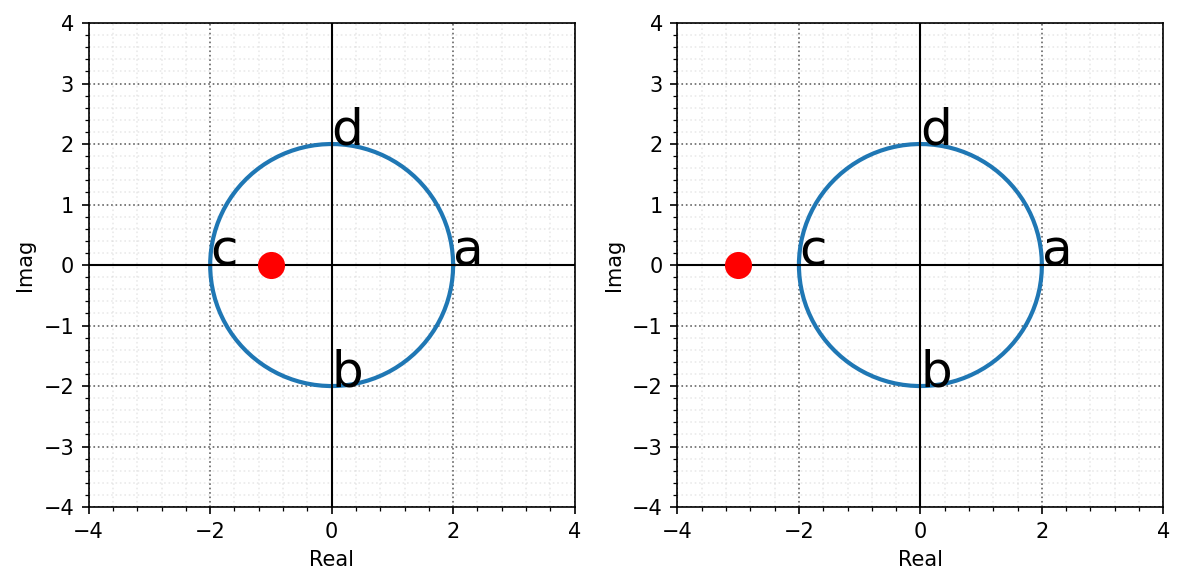

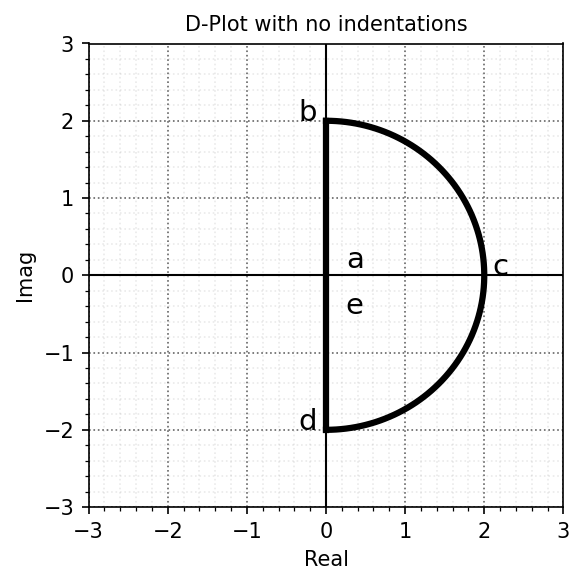

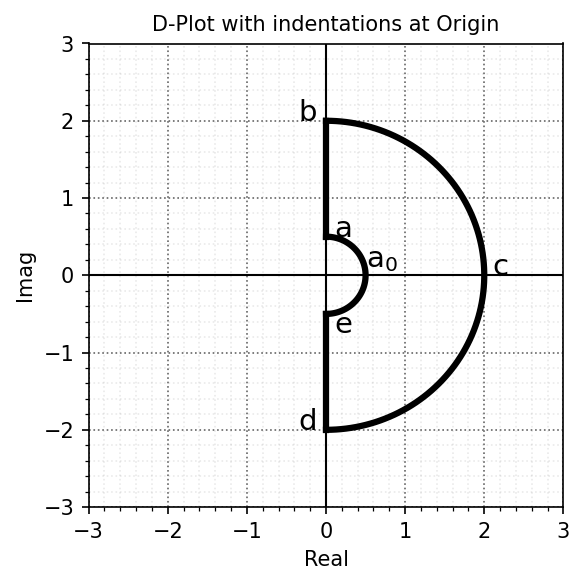

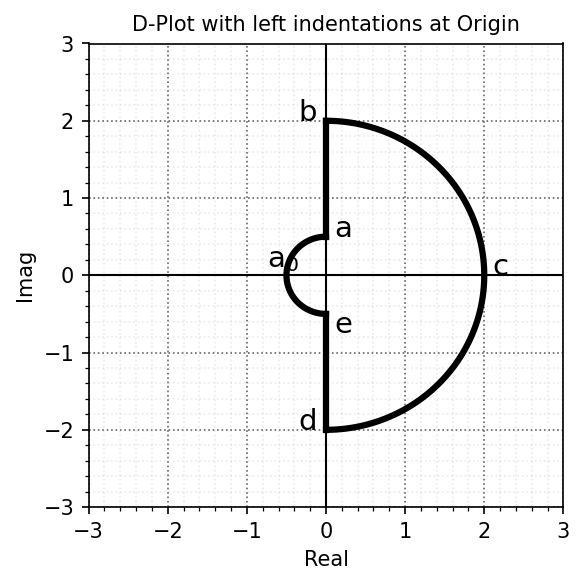

In [5]:
r = 2 #figure size
fig, (c1, c2) = plt.subplots(ncols=2, figsize=(8, 4))
an = np.linspace(0, 2 * np.pi, 100) 
c1.plot(r * np.cos(an), r * np.sin(an))
c2.plot(r * np.cos(an), r * np.sin(an))
c1.set_xlim((-4,4))
c2.set_xlim((-4,4))
c1.set_ylim((-4,4))
c2.set_ylim((-4,4))
nicegrid(c1)
nicegrid(c2)
c1.plot(-1,0,'ro',ms=12)
c2.plot(-3,0,'ro',ms=12)
c1.text(r,0,'a',fontsize=24) 
c1.text(0,-r,'b',fontsize=24) 
c1.text(-r,0,'c',fontsize=24) 
c1.text(0,r,'d',fontsize=24) 
c2.text(r,0,'a',fontsize=24) 
c2.text(0,-r,'b',fontsize=24) 
c2.text(-r,0,'c',fontsize=24) 
c2.text(0,r,'d',fontsize=24) 
c1.set_xlabel('Real')
c2.set_xlabel('Real')
c1.set_ylabel('Imag')
c2.set_ylabel('Imag')
savefig("./figs/L18_circ.pdf", dpi=600)
plt.show()

r = 2
an = np.linspace(np.pi/2, -np.pi/2, 100) 
fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(.25,0.1,'a',fontsize=14) 
c3.text(.250,-0.5,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with no indentations')
savefig("./figs/L19_circ2.pdf", dpi=600)
plt.show()

RR = 0.5
r = 2
an = np.linspace(np.pi/2, -np.pi/2, 100) 
fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot(RR * np.cos(an), RR * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,-RR],'k',lw=3)
c3.plot([0,0],[RR,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(0.1,RR,'a',fontsize=14) 
c3.text(RR,0.1,r'a$_0$',fontsize=14) 
c3.text(.1,-RR-.25,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with indentations at Origin')
savefig("./figs/L19_circ3.pdf", dpi=600)
plt.show()

fig, (c3) = plt.subplots(ncols=1, figsize=(4, 4))
c3.plot(r * np.cos(an), r * np.sin(an),'k',lw=3)
c3.plot(-RR * np.cos(an), RR * np.sin(an),'k',lw=3)
c3.plot([0,0],[-r,-RR],'k',lw=3)
c3.plot([0,0],[RR,r],'k',lw=3)
c3.set_xlim((-3,3))
c3.set_ylim((-3,3))
nicegrid(c3)
c3.text(0.1,RR,'a',fontsize=14) 
c3.text(-RR-.25,0.1,r'a$_0$',fontsize=14) 
c3.text(.1,-RR-.25,'e',fontsize=14) 
c3.text(-.35,-r,'d',fontsize=14) 
c3.text(r+.1,0,'c',fontsize=14) 
c3.text(-.35,r,'b',fontsize=14) 
c3.set_xlabel('Real')
c3.set_ylabel('Imag')
c3.set_title('D-Plot with left indentations at Origin')
savefig("./figs/L19_circ4.pdf", dpi=600)
plt.show()

## <a id='toc1_2_'></a>[Example 20-4](#toc0_)

<TransferFunction>: sys[32]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


3 s^2 + 36 s + 108
------------------
 s^3 + 2 s^2 + s



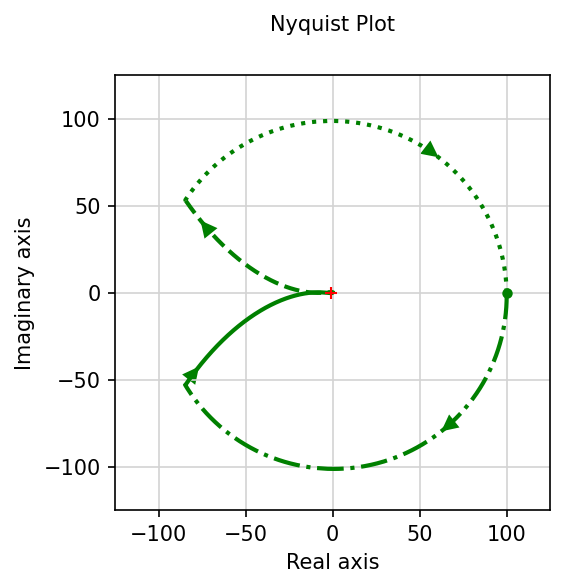

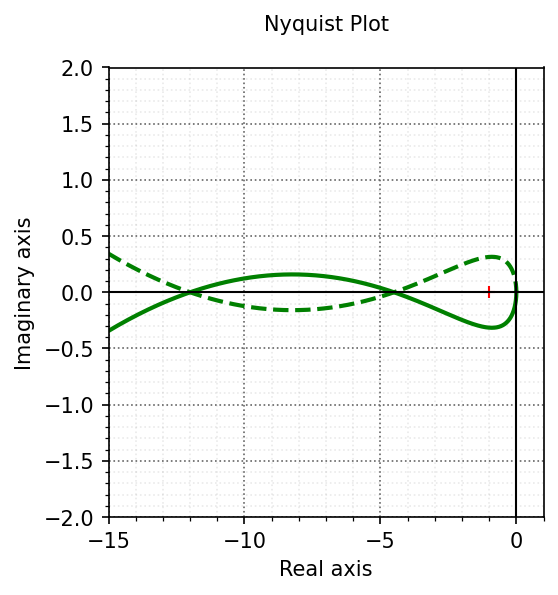

In [6]:
#20-4
G = 3*tf([1],[1, 0])*tf([1,6],[1, 1])**2 
print(G)

w=np.append(0,np.logspace(-3,3,5000))
RR = 0.05

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
Gcl1 = feedback(G,1) 

kwargs = {'color':'g'}
resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='Nyquist Plot')
plt.xlim([-125,125])
plt.ylim([-125,125])
ax.set_aspect('equal')
savefig("./figs/L18_circ2a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g'}
resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='Nyquist Plot')
plt.xlim([-15,1])
plt.ylim([-2,2])
nicegrid(ax)
savefig("./figs/L18_circ2b.pdf", dpi=600)


## <a id='toc1_3_'></a>[Side by Side Nyquist](#toc0_)

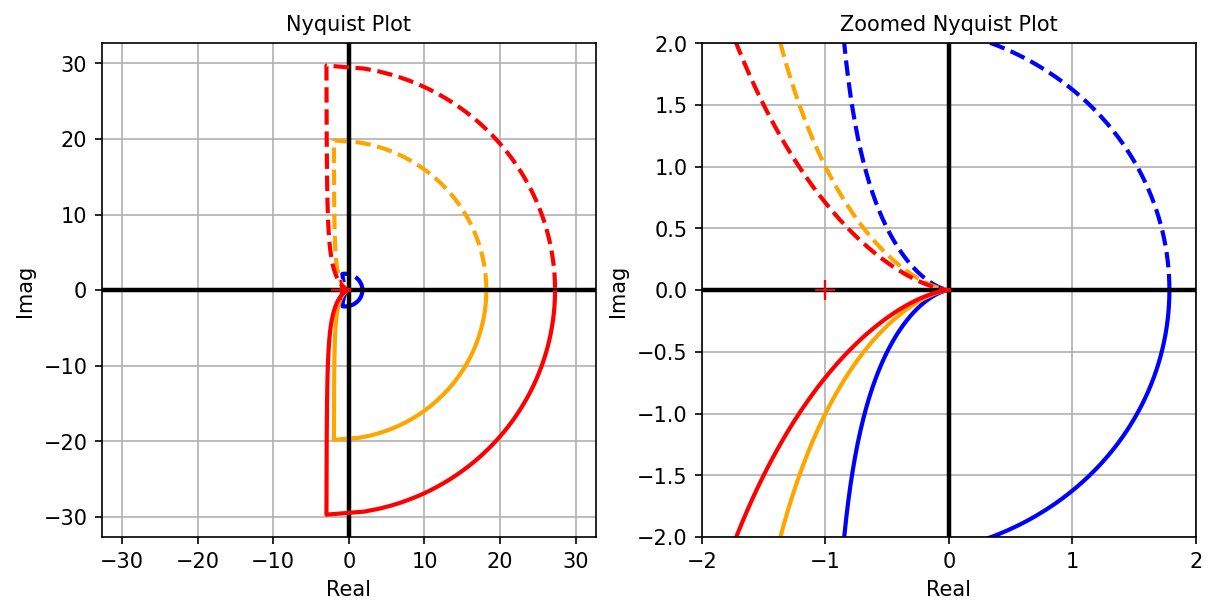

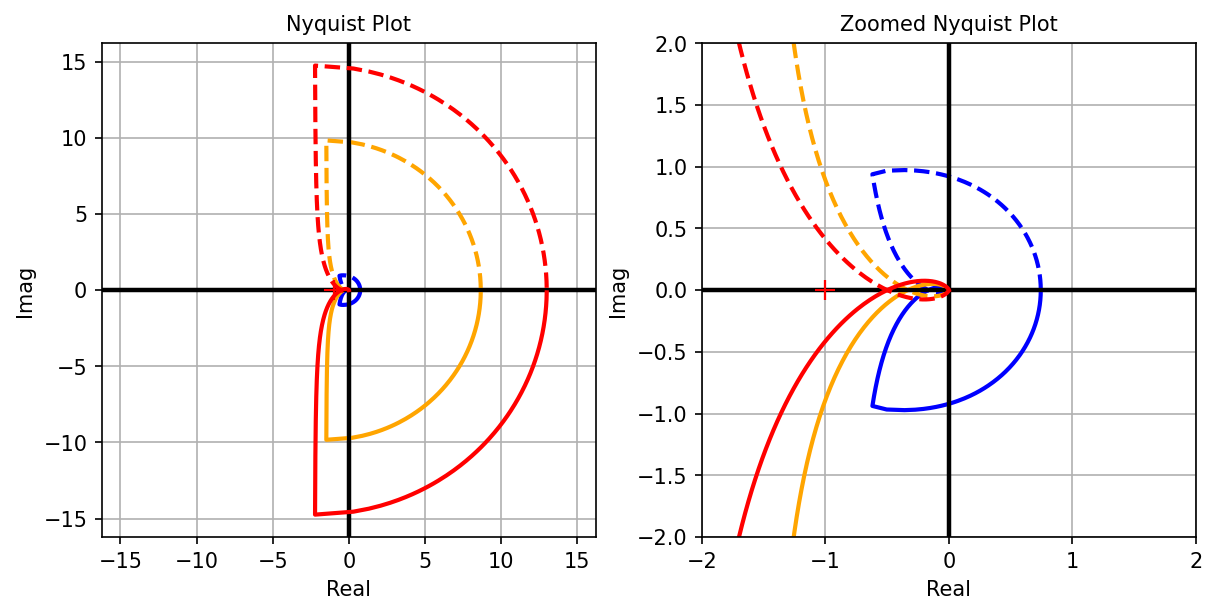

In [59]:
def Nyquist_side_by_side(G = None, resp = None, ax = None, RR = 0.1, w = np.logspace(-3,3,1000),col='b'):
    if resp is None:    
        if G is None:
            print("Nothing to do")
            return
        resp = nyquist_response(G,w,indent_direction='right',indent_radius=RR,indent_points=100)

    if ax is None:
        fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
        return_flag = True
    else:
        return_flag = False

    maxsize = 1.1*max(np.max(np.abs(resp.response.real)), np.max(np.abs(resp.response.imag)))
    ax[0].set_xlim([-maxsize,maxsize])
    ax[0].set_ylim([-maxsize,maxsize])
    ax[1].set_xlim([-2,2])
    ax[1].set_ylim([-2,2])
    for ii in range(2):
        ax[ii].set_aspect('equal')
        ax[ii].axhline(y=0,ls='-',c='k')
        ax[ii].axvline(x=0,ls='-',c='k')
    
        ax[ii].plot(resp.response.real, resp.response.imag, color=col)
        ax[ii].plot(resp.response.real, -resp.response.imag, color=col,ls='--')
        ax[ii].plot(-1, 0, 'r+',ms=10)
        ax[ii].set_xlabel('Real')
        ax[ii].set_ylabel('Imag')
    ax[0].set_title('Nyquist Plot')
    ax[1].set_title('Zoomed Nyquist Plot')
    
    return ax

G = tf(1,[1,1,0])
ax1 = Nyquist_side_by_side(G = G, RR = RR)
ax2 = Nyquist_side_by_side(G = 2*G, ax=ax1, col='orange')
ax3 = Nyquist_side_by_side(G = 3*G, ax=ax2, col='red')

G = tf(1,[1,1,0])*tf(1,[1,2])
ax1 = Nyquist_side_by_side(G = G, RR = RR)
ax2 = Nyquist_side_by_side(G = 2*G, ax=ax1, col='orange')
ax3 = Nyquist_side_by_side(G = 3*G, ax=ax2, col='red')


In [79]:
G1 = tf(1,[1,1,0])
print(f"Initial Angle {np.angle(G1(.0001j))*180/np.pi:>8.2f}")
print(f"Final Angle   {np.angle(G1(1000j))*180/np.pi:>8.2f}")

G2 = tf(1,[1,1,0])*tf(1,[1,2])
print(f"Initial Angle {np.angle(G2(.0001j))*180/np.pi:>8.2f}")
print(f"Final Angle   {np.angle(G2(1000j))*180/np.pi:>8.2f}")


Initial Angle   -90.01
Final Angle    -179.94
Initial Angle   -90.01
Final Angle      90.17


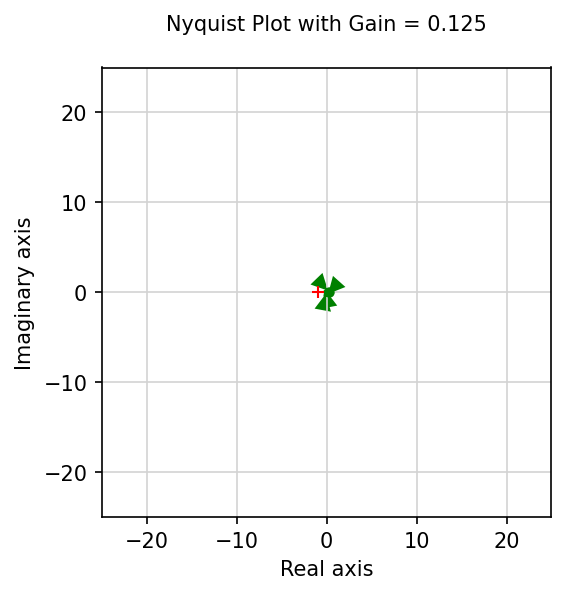

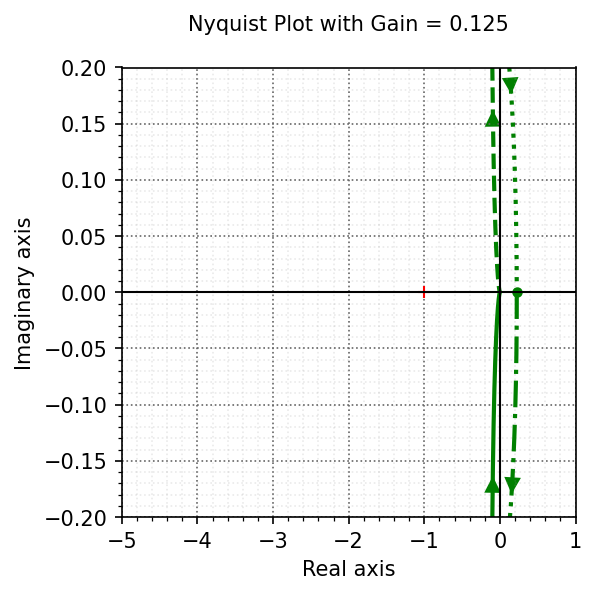

In [52]:
#20-4
gain = 1/8

w=np.append(0,np.logspace(-3,3,5000))
RR = 0.05*8

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
Gcl1 = feedback(G,1) 

kwargs = {'color':'g'}
resp = nyquist_response(gain*G,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='Nyquist Plot with Gain = '+str(gain))
plt.xlim([-25,25])
plt.ylim([-25,25])
ax.set_aspect('equal')
savefig("./figs/L18_circ3a.pdf", dpi=600)

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150,constrained_layout = True)
kwargs = {'color':'g'}
resp = nyquist_response(gain*G,w,indent_direction='right',indent_radius=RR,indent_points=100)
nyquist_plot(resp,**kwargs,title='Nyquist Plot with Gain = '+str(gain))
plt.xlim([-5,1])
plt.ylim([-.2,.2])
nicegrid(ax)
savefig("./figs/L18_circ3b.pdf", dpi=600)


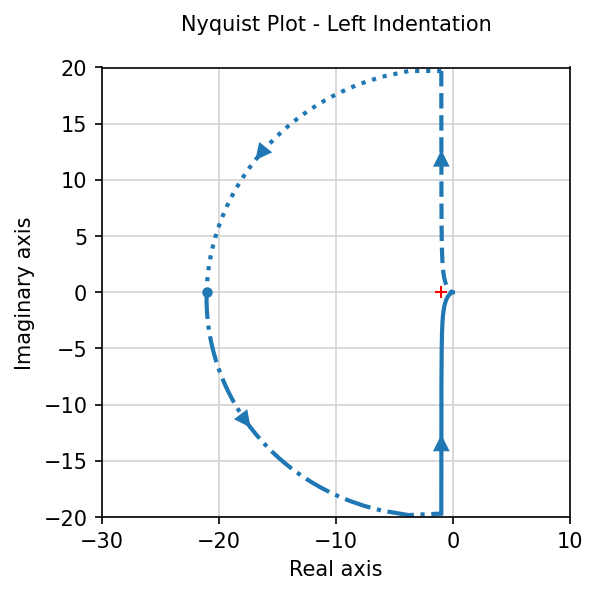

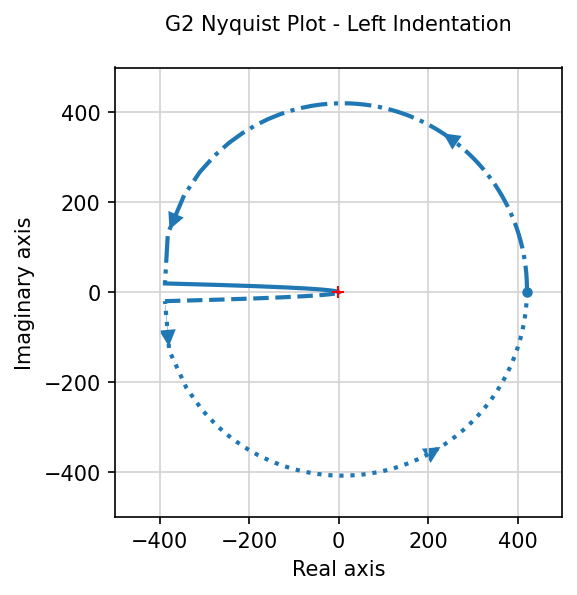

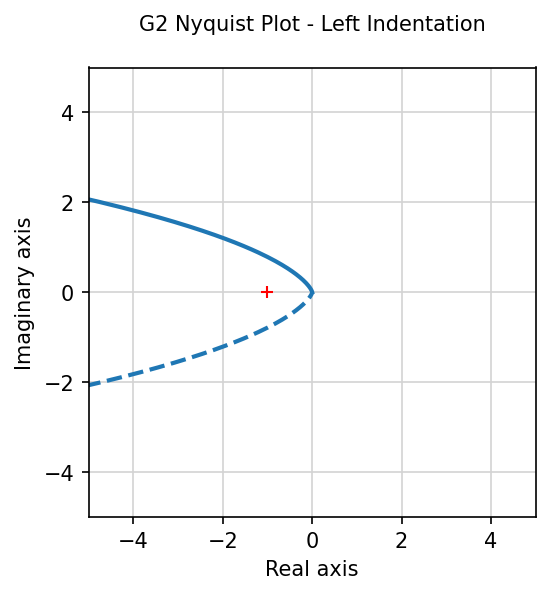

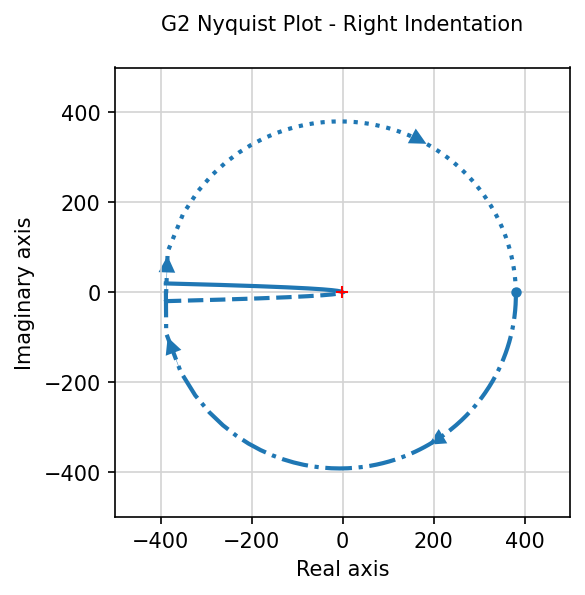

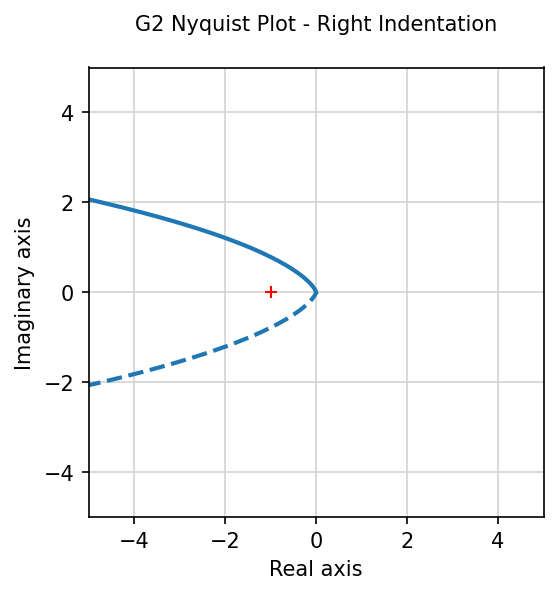

In [8]:
w = np.logspace(-6, 4, 1000)
#G = zpk([], [0, -2, -3], gain=100)
G1 = tf([1],[1, 1]) * tf([1],[1, 0])
ct.set_defaults('nyquist',max_curve_magnitude = 200)

dir = 'left'
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G1,w,indent_points=100,indent_direction=dir,indent_radius=0.05)
resp.plot(title='Nyquist Plot - '+dir.capitalize()+' Indentation')
plt.xlim(-30,10)
plt.ylim(-20,20)
#plt.xlim(-2,2)
#plt.ylim(-2,2)

XX = 500
ct.set_defaults('nyquist',max_curve_magnitude = XX)
dir = 'left'
G2 = tf([1],[1, 1]) * tf([1],[1, 0])**2
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G2,w,indent_points=100,indent_direction=dir,indent_radius=0.05)
resp.plot(title='G2 Nyquist Plot - '+dir.capitalize()+' Indentation')
plt.xlim(-XX,XX)
plt.ylim(-XX,XX)

XX = 5
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp.plot(title='G2 Nyquist Plot - '+dir.capitalize()+' Indentation')
plt.xlim(-XX,XX)
plt.ylim(-XX,XX)

XX = 500
dir = 'right'
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G2,w,indent_points=100,indent_direction=dir,indent_radius=0.05)
resp.plot(title='G2 Nyquist Plot - '+dir.capitalize()+' Indentation')
plt.xlim(-XX,XX)
plt.ylim(-XX,XX)

XX = 5
dir = 'right'
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G2,w,indent_points=100,indent_direction=dir,indent_radius=0.05)
resp.plot(title='G2 Nyquist Plot - '+dir.capitalize()+' Indentation')
plt.xlim(-XX,XX)
plt.ylim(-XX,XX)

plt.show()

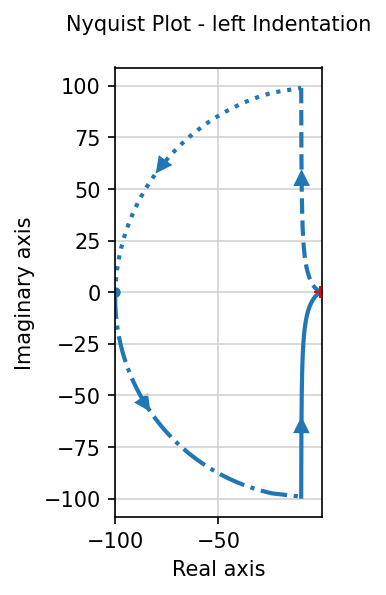

99.99999999999999

In [9]:
#from platform import python_version
#print("Running Python:",python_version())
#! pip list | grep control
#w = np.logspace(-6, 4, 1000)

from control import nyquist_plot, zpk, nyquist_response, tf
import matplotlib.pyplot as plt
import numpy as np
import control as ct
RR = 0.1
ct.set_defaults('nyquist',max_curve_magnitude = 1/RR**2)

G2 = 10*tf([1],[1, 1]) * tf([1],[1, 0])**1

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = nyquist_response(G2,indent_points=100,indent_direction='left',indent_radius=RR)
resp.plot(title='Nyquist Plot - left Indentation')
#plt.xlim(-2.5/RR,2.5/RR)
#plt.ylim(-2.5/RR,2.5/RR)
#plt.xlim(-4.5/RR,4.5/RR)
#plt.ylim(-4.5/RR,4.5/RR)
ax.set_aspect('equal')
plt.show()
ct.defaults['nyquist.max_curve_magnitude']

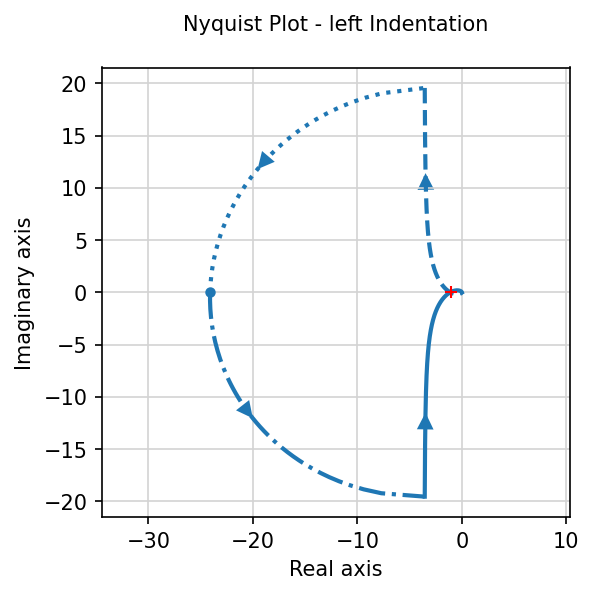

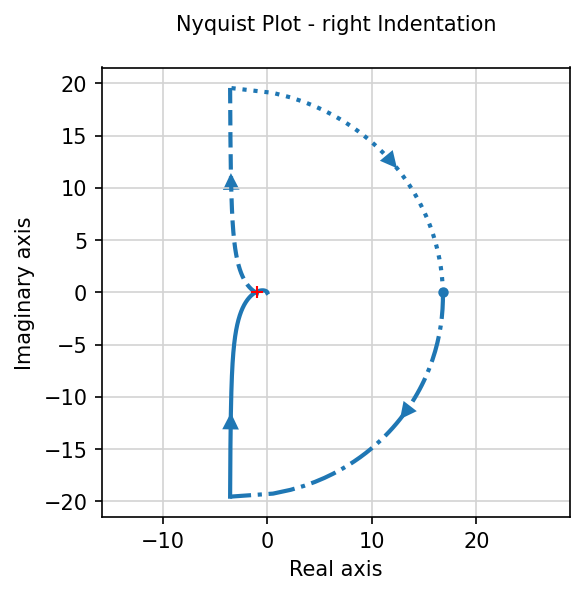

TransferFunction(array([2]), array([   1.000,    1.800,    1.000,    0.000]))

In [10]:
from control import nyquist_plot, zpk, nyquist_response, tf
from matplotlib import pyplot as plt
import numpy as np
K = 2
num = 1
den = np.convolve([1, 0], [1, 2 * 0.9 * 1, 1])
sys1 = tf(num,den)
sys2 = tf(K*num,den)

import control as ct

RR = 0.1
fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = ct.nyquist_response(sys2,indent_direction='left',indent_radius=RR)
resp.plot(title='Nyquist Plot - left Indentation')
plt.axis([-2.5/RR,2.5/RR,-2.5/RR,2.5/RR])
plt.axis('equal')
plt.show()

fig, ax = plt.subplots(1,figsize=(4, 4),dpi=150)
resp = ct.nyquist_response(sys2,indent_direction='right',indent_radius=RR)
resp.plot(title='Nyquist Plot - right Indentation')
plt.axis([-2.5/RR,2.5/RR,-2.5/RR,2.5/RR])
plt.axis('equal')
plt.show()
sys2


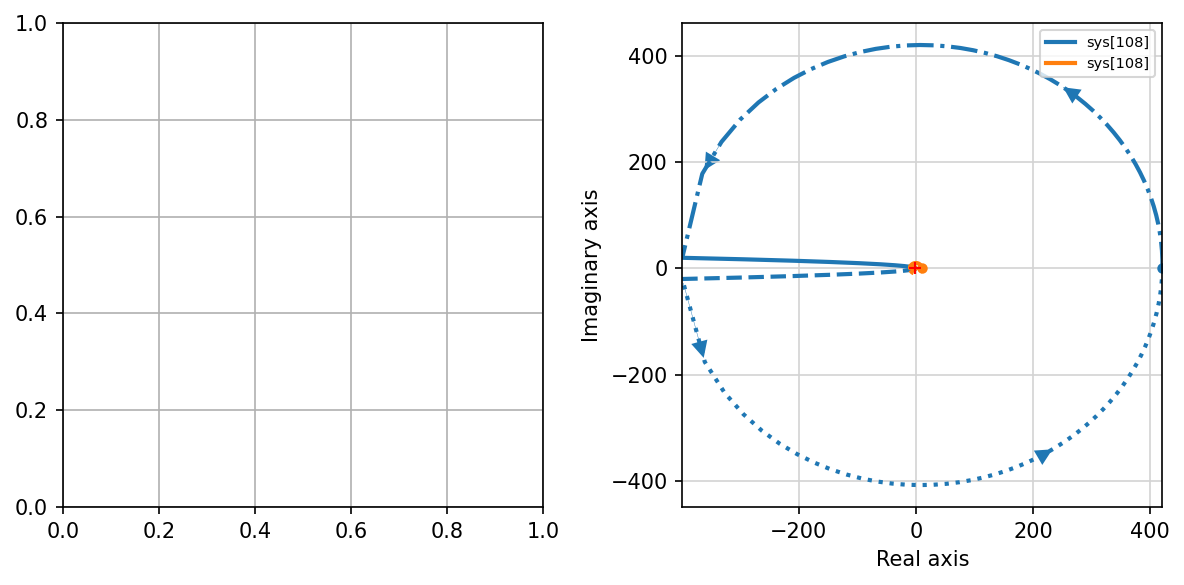

In [11]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

G = ct.tf([1], [1, 1]) * ct.tf([1], [1, 0])**2

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150)

resp = ct.nyquist_response(G, indent_direction='left', indent_radius=0.05)
cplt = resp.plot(max_curve_magnitude=1000,ax=ax[0])

cplt = resp.plot(max_curve_magnitude=10,ax=ax[1])
